In [1]:
""" Perform Sentiment Analysis in the network graph using RNN. """

' Perform Sentiment Analysis in the network graph using RNN. '

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense ,SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import networkx as nx
from tensorflow.keras.datasets import imdb

In [3]:
# Sample data
texts = ["I love this product", "This is terrible", "Absolutely great experience"]
labels = [1, 0, 1]  # Binary sentiment

In [4]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)

In [5]:
# Convert labels to NumPy array
labels = np.array(labels)

In [6]:
# Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # removed input_length warning
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, labels, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.6914
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6667 - loss: 0.6853
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 0.6789
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6667 - loss: 0.6722
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6667 - loss: 0.6649


In [8]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=100)
    prediction = model.predict(padded)[0][0]
    return 'positive' if prediction > 0.5 else 'negative'

In [9]:
G = nx.DiGraph()

In [10]:
# Add nodes with sentiment
nodes = {
    1: "I love this!",
    2: "This is bad",
    3: "Agreed!"
}

In [11]:
# Add edges (e.g., reply or retweet)
G.add_edge(2, 1)  # user 2 replied to user 1
G.add_edge(3, 1)

In [12]:
for node_id, text in nodes.items():
    sentiment = predict_sentiment(text)
    G.add_node(node_id, sentiment=sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [13]:
color_map = []
for node in G:
    color_map.append('green' if G.nodes[node]['sentiment'] == 'positive' else 'red')

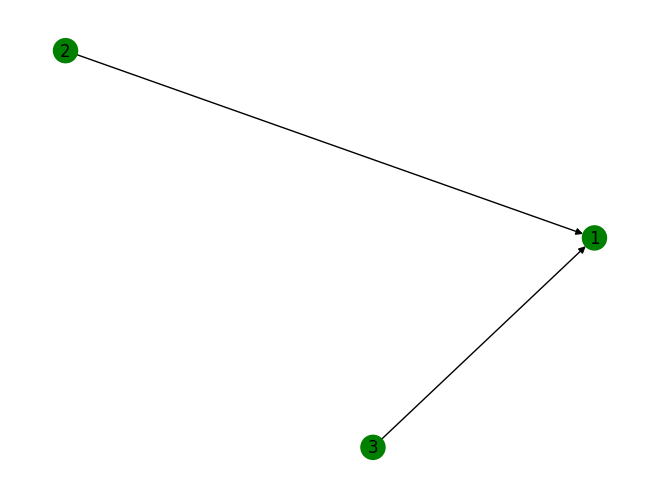

In [14]:
nx.draw(G, with_labels=True, node_color=color_map)
plt.show()

In [15]:
#load dataaa
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
# pad_sequences
x_train = pad_sequences(x_train,maxlen=200)
x_test = pad_sequences(x_test,maxlen=200)

In [16]:
#RNN
model = Sequential([
    Embedding(input_dim=10000,output_dim=32,input_length=200),
    SimpleRNN(64),
    Dense(1,activation='sigmoid') # binary sentiment
])
#compile and train
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=64,validation_split=0.2)

Epoch 1/3


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.5702 - loss: 0.6618 - val_accuracy: 0.6676 - val_loss: 0.6085
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7832 - loss: 0.4741 - val_accuracy: 0.8014 - val_loss: 0.4389
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8661 - loss: 0.3263 - val_accuracy: 0.8298 - val_loss: 0.3971


In [17]:
# Evaluate
loss,acc=model.evaluate(x_test,y_test)
print('Test Accuracy= ',acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8274 - loss: 0.4045 
Test Accuracy=  0.8292800188064575


In [18]:
# Pick one review from test set
sample = x_test[0]  # Already padded

# Predict
prediction = model.predict(sample.reshape(1, 200))[0][0]
print("Predicted Sentiment:", "Positive 😊" if prediction > 0.5 else "Negative 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted Sentiment: Negative 😞
